# Brain Tumor Classification from MRI Images Using Deep Learning 🧠 #
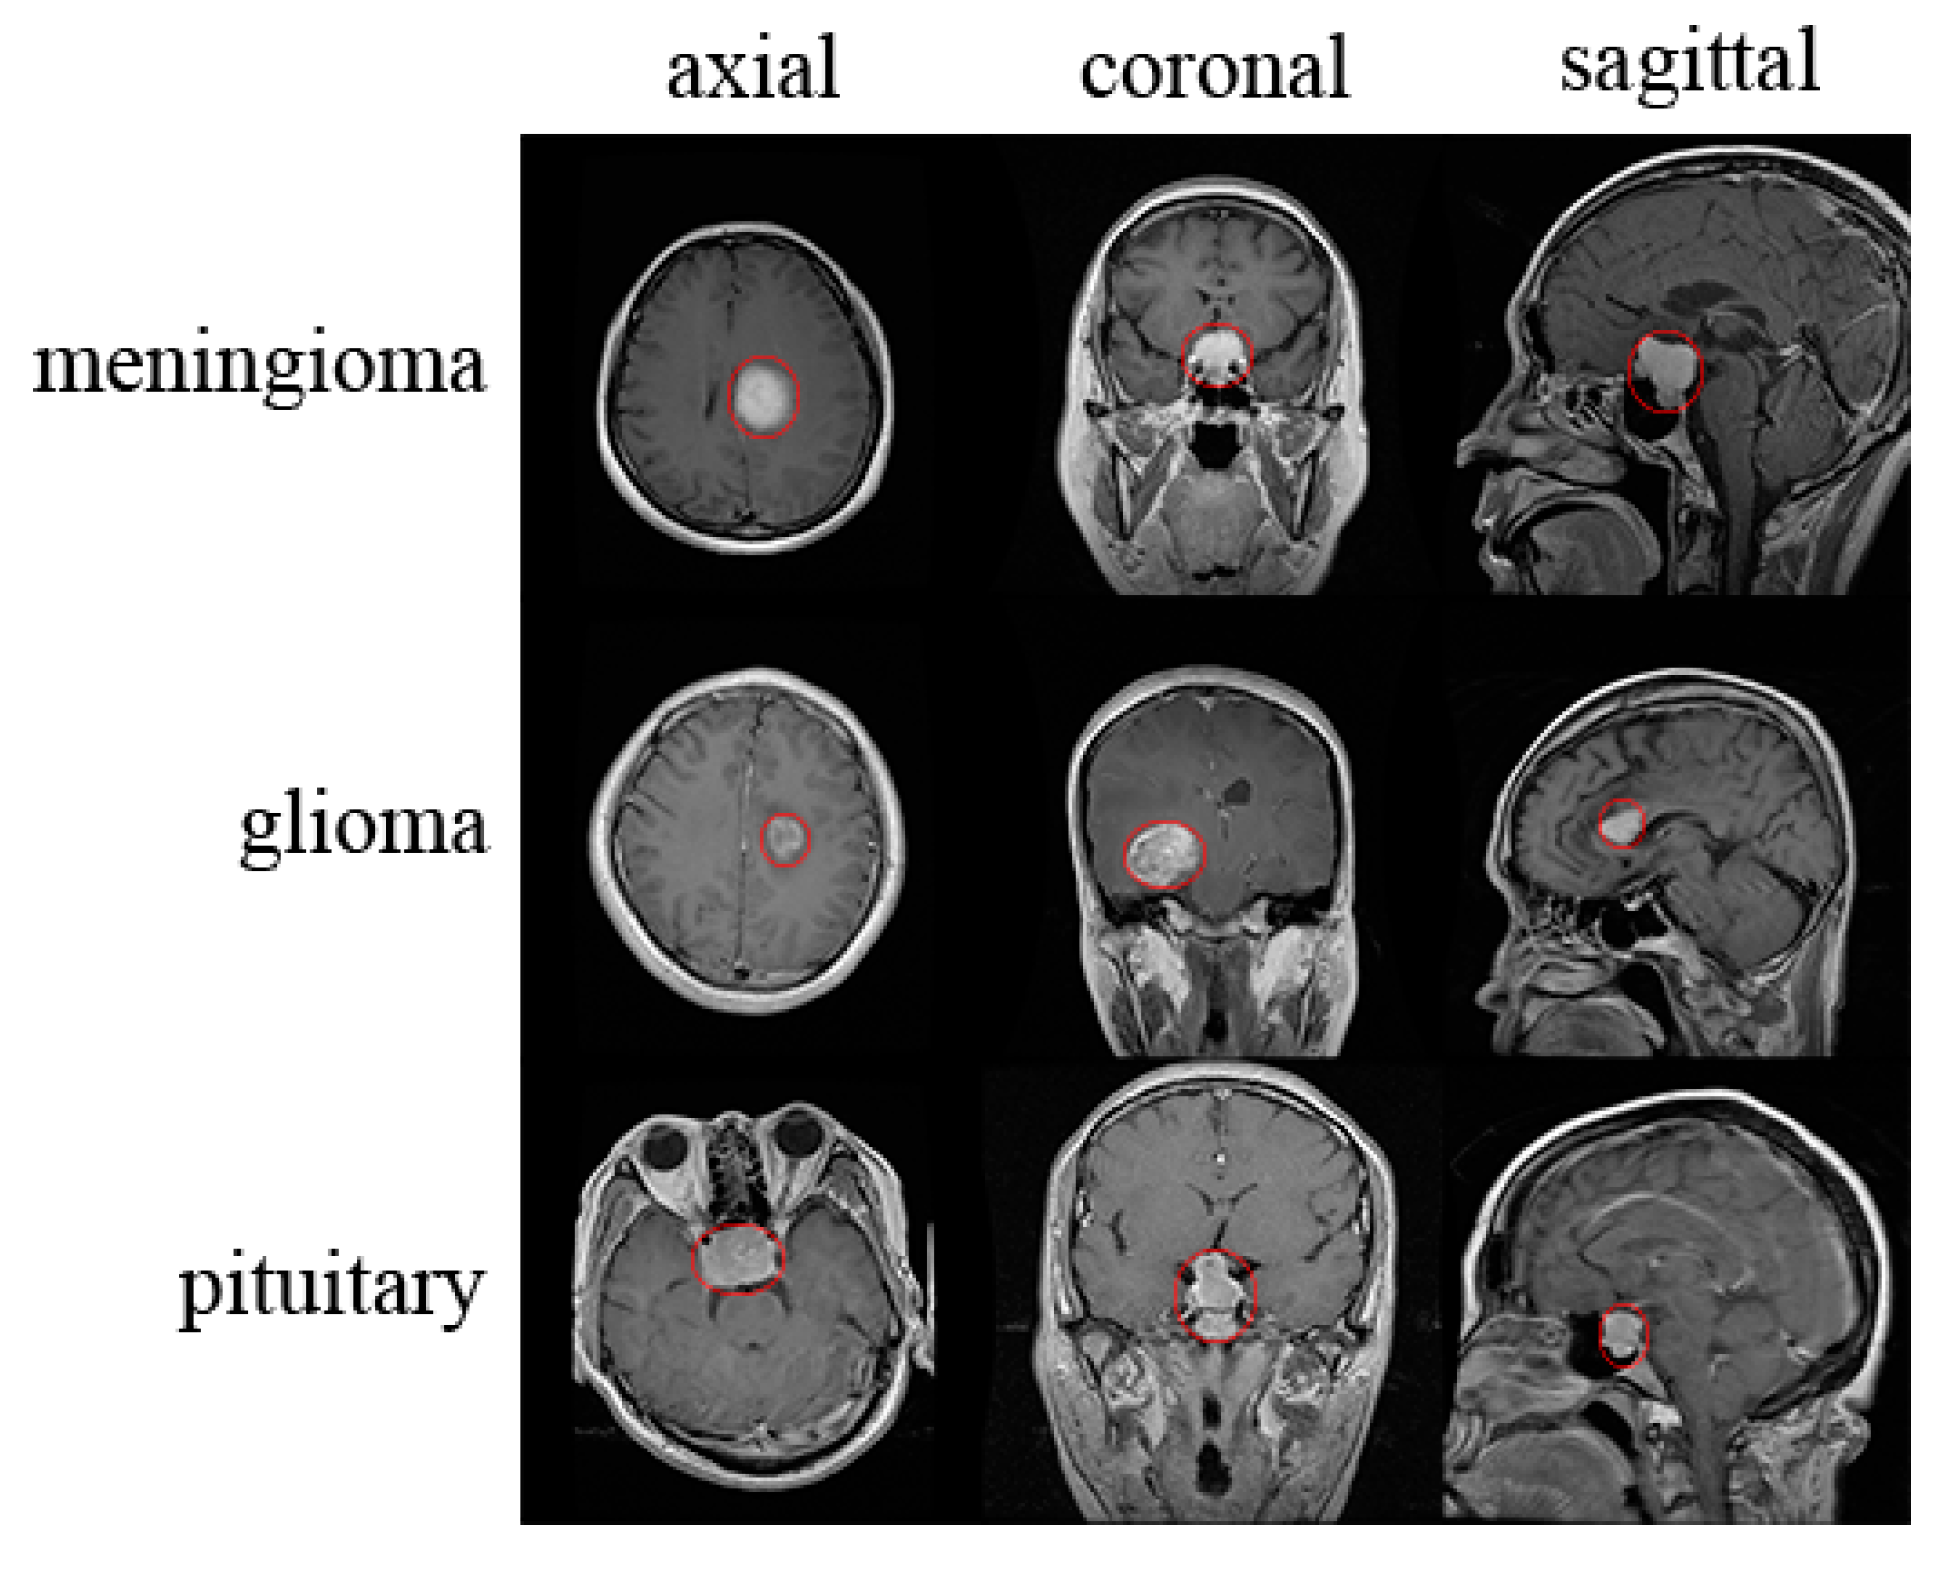

<center> Brain tumors consist of cancerous or non-cancerous uncontrolled growth of abnormal cells in the central nervous system (CNS) that have no physiological function. They can be benign or malignant; both increase pressure in the brain as well as swelling. This eventually leads to a variety of unpleasant symptoms, ranging from personality changes to tremors and even death. Magnetic resonance imaging (MRI) is a brain imaging technique used to provide information on the type, size, position, and shape of a brain tumor, therefore it aids in diagnosis. With the help of deep learning, brain tumor classification techniques may help further classify the tumor into categories, such as the type of tumor present. The aim of this project is to implement a deep learning algorithm to classify MRI brain images into four categories: no tumor, glioma, meningioma, and pituitary. Therefore, answering the question “How accurately can a deep learning model identify and classify different types of tumors using MRI images?”. <center>

**Link to dataset:** https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data?select=Training

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt                                                 #For data visualization
import seaborn as sns                                                           #For data visualization
import numpy as np                                                              #For numerical computations
import pandas as pd                                                             #For data analysis & manipulation
import os                                                                       #Allows interacting with underlying OS
import cv2                                                                      #For computer vision and image processing tasks
from sklearn.metrics import confusion_matrix,classification_report              #To evaluate classification accuracy using confusion matrix & classification report
import tensorflow as tf                                                         #Main library for building & training deep learning models
from tensorflow.keras.models import Sequential                                  #To create a sequential
from tensorflow.keras.models import load_model                                  #To load a pre-trained model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.utils import load_img                                     #To load images as a numpy array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomContrast
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomTranslation
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint                          #To save the model or weights at an interval
from sklearn.model_selection import train_test_split                            #To split the data into train & test
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imutils
from PIL import Image

## Load training data

In [ ]:
#Define data path
train_data_path ='/content/drive/MyDrive/archive/Training'
#List to store file paths and labels (folder names)
filepaths =[]
labels = []
#This will list the classes in the training data
folds = os.listdir(train_data_path)
#Collect file paths and labels and add them to the list
for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Turn lists into Pands series and concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
train_df

,filepaths,label
0,/content/drive/MyDrive/archive/Training/notumo...,notumor
1,/content/drive/MyDrive/archive/Training/notumo...,notumor
2,/content/drive/MyDrive/archive/Training/notumo...,notumor
3,/content/drive/MyDrive/archive/Training/notumo...,notumor
4,/content/drive/MyDrive/archive/Training/notumo...,notumor
...,...,...
5707,/content/drive/MyDrive/archive/Training/glioma...,glioma
5708,/content/drive/MyDrive/archive/Training/glioma...,glioma
5709,/content/drive/MyDrive/archive/Training/glioma...,glioma
5710,/content/drive/MyDrive/archive/Training/glioma...,glioma


## Load test data

In [ ]:
#Define data path
test_data_path = '/content/drive/MyDrive/archive/Testing'
#List to store file paths and labels (folder names)
filepaths =[]
labels = []
#This will list the classes in the training data
folds = os.listdir(test_data_path)
#Collect file paths and labels and add them to the list
for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Turn lists into Pands series and concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
test_df

,filepaths,label
0,/content/drive/MyDrive/archive/Testing/meningi...,meningioma
1,/content/drive/MyDrive/archive/Testing/meningi...,meningioma
2,/content/drive/MyDrive/archive/Testing/meningi...,meningioma
3,/content/drive/MyDrive/archive/Testing/meningi...,meningioma
4,/content/drive/MyDrive/archive/Testing/meningi...,meningioma
...,...,...
1306,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1307,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1308,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1309,/content/drive/MyDrive/archive/Testing/glioma/...,glioma


## EDA: Exploring the dataset and its features

<ipython-input-4-2bf2a8c8fc52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  counttrdata = sns.countplot(data=train_df, y=train_df["label"],palette='rocket')


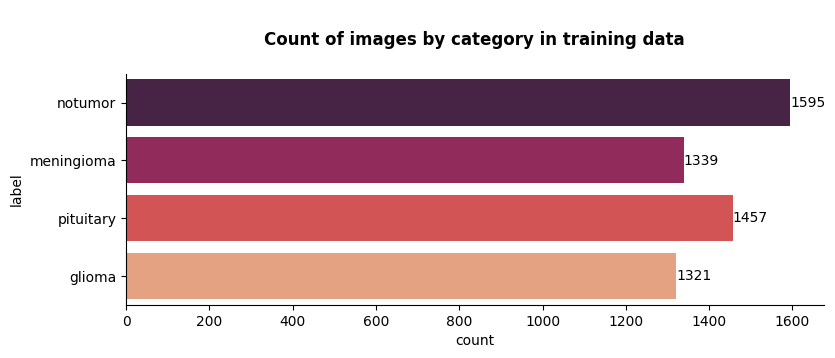

In [ ]:
fig,ax=plt.subplots(figsize=(9,3))
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
counttrdata = sns.countplot(data=train_df, y=train_df["label"],palette='rocket')
for container in counttrdata.containers:
    counttrdata.bar_label(container)
plt.title("\nCount of images by category in training data\n",weight="bold");

<ipython-input-5-09c3840e8a9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  counttsdata = sns.countplot(data=test_df, y=test_df["label"],palette='magma')


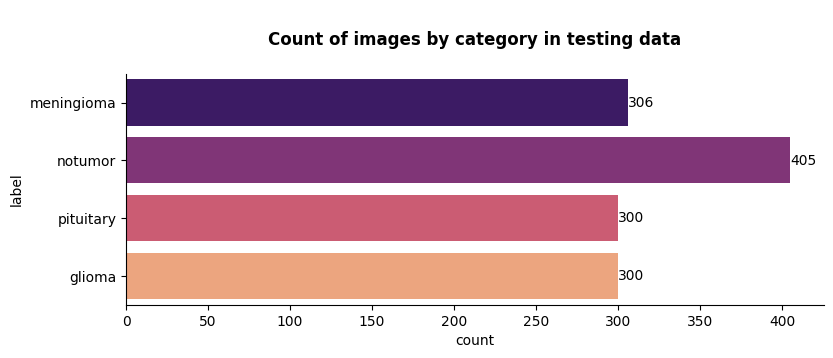

In [ ]:
fig,ax=plt.subplots(figsize=(9,3))
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
counttsdata = sns.countplot(data=test_df, y=test_df["label"],palette='magma')
for container in counttsdata.containers:
    counttsdata.bar_label(container)
plt.title("\nCount of images by category in testing data\n",weight="bold");

In [ ]:
train_df.shape

(5712, 2)

In [ ]:
test_df.shape

(1311, 2)

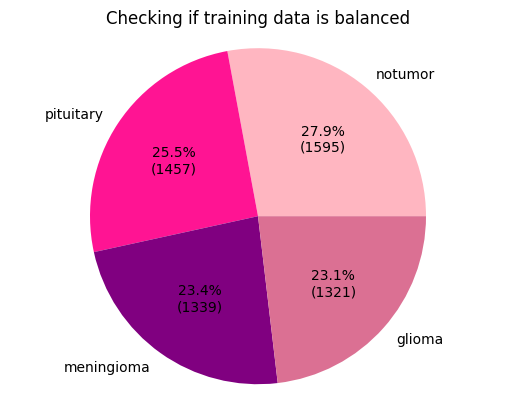

In [ ]:
data_balance = train_df.label.value_counts()
def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)

plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["lightpink","deeppink","purple","palevioletred"])
plt.title("Checking if training data is balanced")
plt.axis("equal")
plt.show()

#### Good! Our data is balanced.

## Split data

**What is the difference between train data, validation data, and test data?** <br>
* Train data: used to train the model
* Validation data: used to fine-tune hyperparameters during model development
* Test data: used to evaluate the performance of the trained model on unseen examples

In [ ]:
valid_df,tst_df=train_test_split(test_df,test_size=0.5,random_state=50,stratify=test_df["label"])

## Data resizing

CNN models require images to be of the same size, because having images with varying dimensions can lead to complications during training. Thus, resizing is crucial to simplify the data handling and processing steps.

In [ ]:
img_size = (200 ,200)
batch_size = 36

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


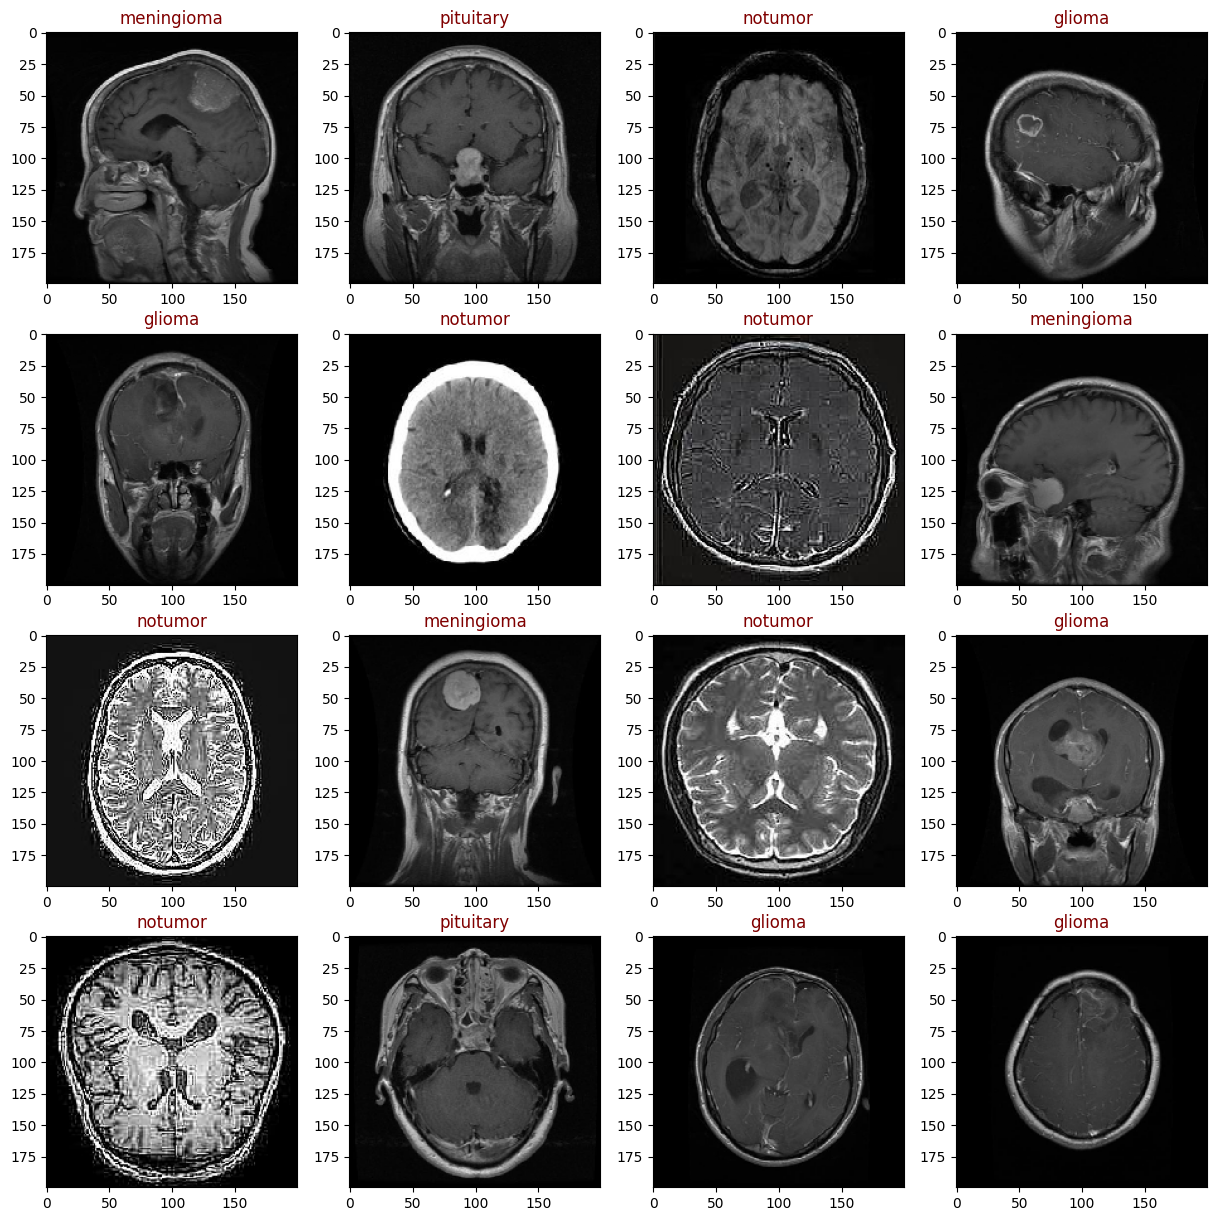

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'maroon' , fontsize= 12)
    plt.axis('on')
plt.show()

## Building the model

In [ ]:
img_shape=(200,200,3)
base_Model = tf.keras.applications.Xception(include_top= False,weights= "imagenet",
                                            input_shape= img_shape, pooling= 'max')

Model = Sequential([
    base_Model,
    Dropout(rate= 0.5),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

Model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21069740 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


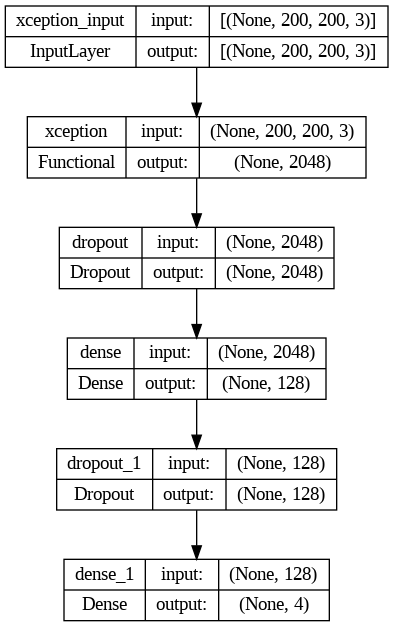

In [ ]:
tf.keras.utils.plot_model(Model,show_shapes=True)

## Training the model

The keyword 'history' is used to record the training metrics while the model performs an epoch. <br>
**Epoch:** An iterative method of training to increase accuracy.

In [ ]:
checkpoint = ModelCheckpoint('model_weights.h5', save_best_only=True, monitor='val_loss', mode='min')
history=Model.fit(train_gen,epochs=8, validation_data=valid_gen, callbacks=[checkpoint], shuffle=False)

Epoch 1/8
159/159 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9312 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


159/159 [==============================] - 4788s 30s/step - loss: 0.2145 - accuracy: 0.9312 - val_loss: 0.0919 - val_accuracy: 0.9649
Epoch 2/8
159/159 [==============================] - 4662s 29s/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.0663 - val_accuracy: 0.9786
Epoch 3/8
159/159 [==============================] - 4660s 29s/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0424 - val_accuracy: 0.9893
Epoch 4/8
159/159 [==============================] - 4658s 29s/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 5/8
159/159 [==============================] - 4632s 29s/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0265 - val_accuracy: 0.9878
Epoch 6/8
159/159 [==============================] - 4647s 29s/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0371 - val_accuracy: 0.9847
Epoch 7/8
159/159 [==============================] - 4710s 30s/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0504 - val_accuracy: 0.9908
Ep

## Visualize model performance

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 2000x800 with 0 Axes>

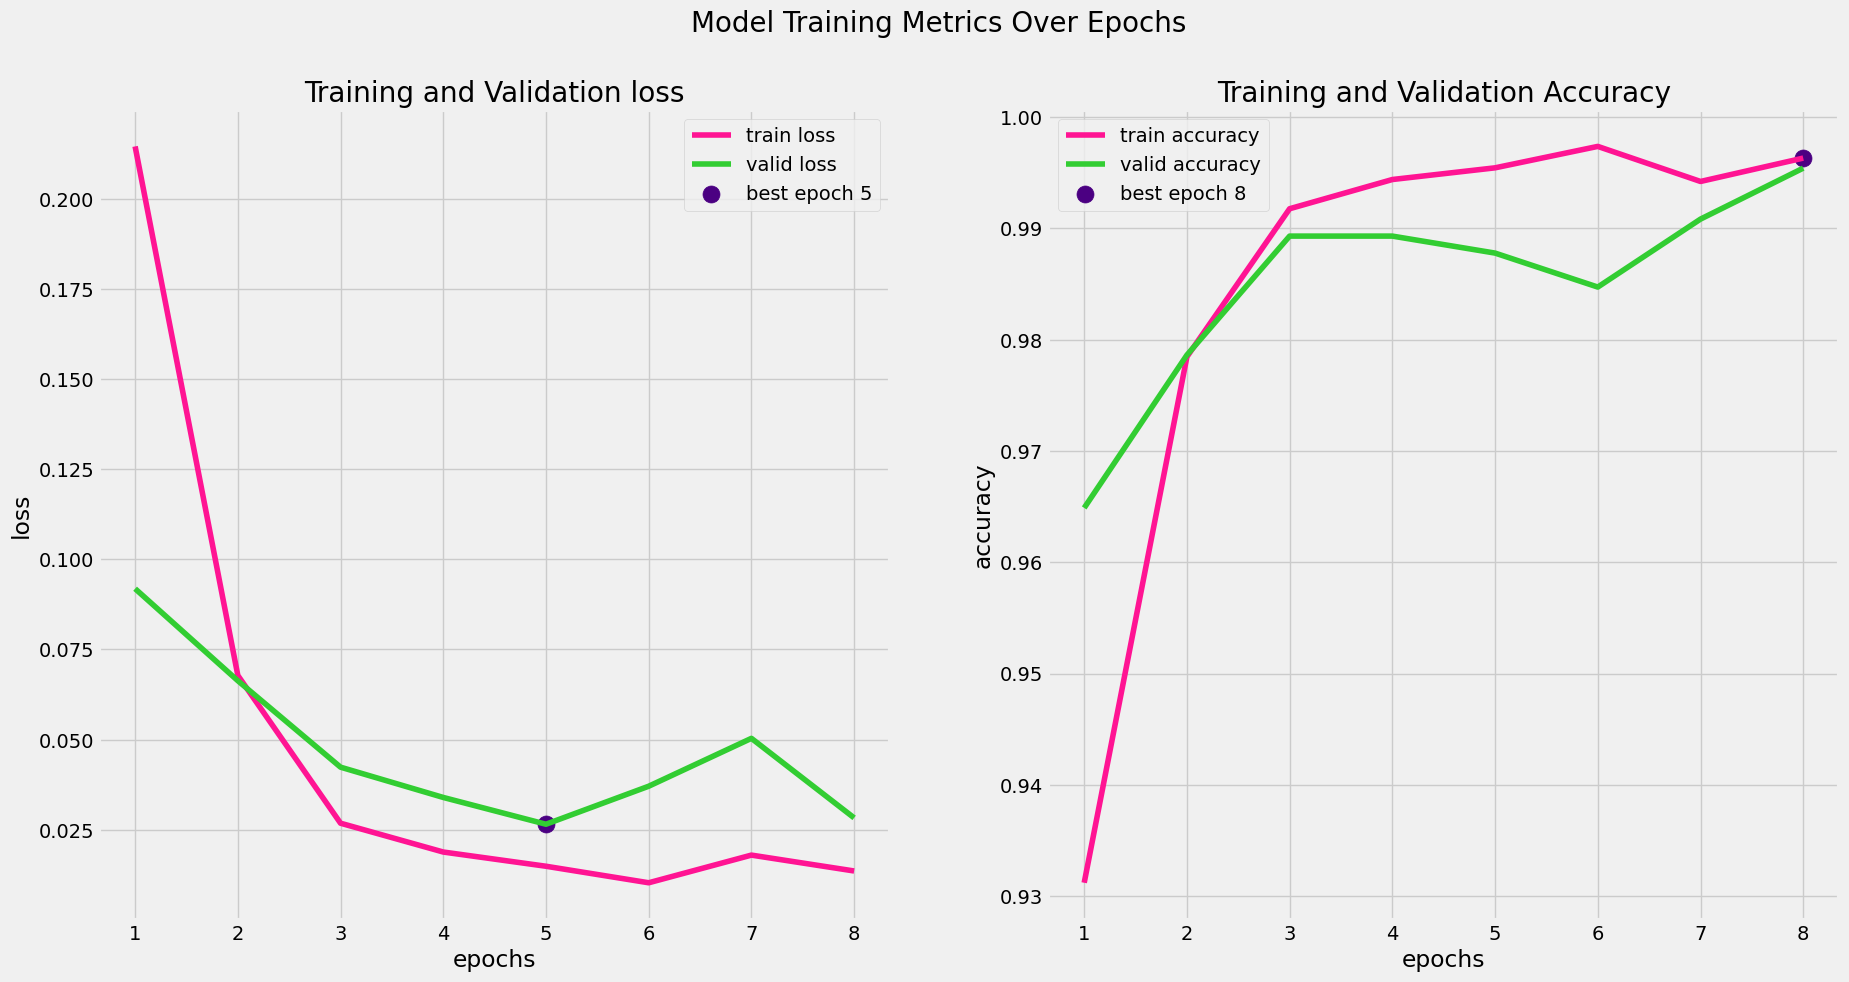

In [ ]:
plt.figure(figsize=(20, 8))
tr_loss=history.history["loss"]
val_loss=history.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"deeppink",label="train loss")
plt.plot(epochs,val_loss,"limegreen",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="indigo",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"deeppink",label="train accuracy")
plt.plot(epochs,val_accuracy,"limegreen",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="indigo",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()


plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

## Model evaluation

In [ ]:
train_score=Model.evaluate(train_gen)
valid_score=Model.evaluate(valid_gen)
test_score=Model.evaluate(test_gen)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

37/37 [==============================] - 254s 7s/step - loss: 0.0308 - accuracy: 0.9931
Train Loss : 0.004
Train Accuracy : 99.82%
--------------------
Validation Loss : 0.028
Validation Accuracy : 99.54%
--------------------
Test Loss: 0.031
Test Accuracy: 99.31%


## Make predictions

In [ ]:
preds=Model.predict(test_gen)
y_pred=np.argmax(preds,axis=1)

37/37 [==============================] - 252s 7s/step


### Confusion matrix

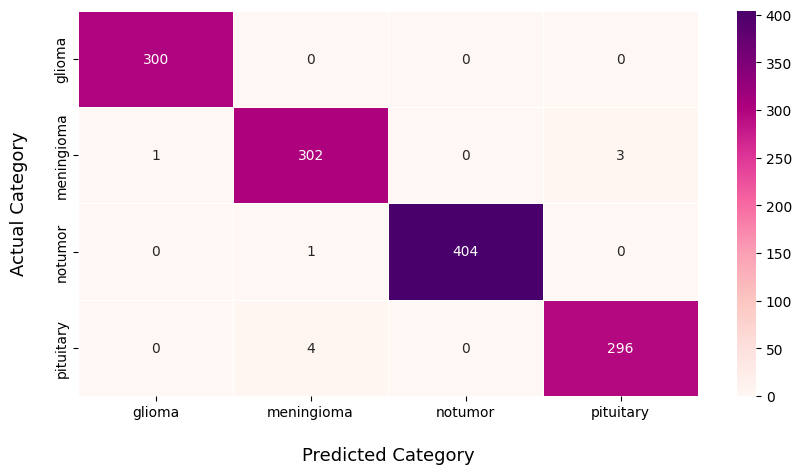

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="RdPu", linewidths=.5)
plt.xlabel('\nPredicted Category',fontsize=13)
plt.ylabel('Actual Category\n',fontsize=13);

### Classification report

In [ ]:
cr=classification_report(test_gen.classes,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.98      0.99      0.99       306
           2       1.00      1.00      1.00       405
           3       0.99      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



## Model deployment using Streamlit
> Unfortunately, due to computational limitations, this step could not be finished. However, I have kept the code for anyone interested in trying it

In [ ]:
#model_name = model.input_names[0][:-6]
#subject = 'Mango Diseases'
#acc = test_score[1] * 100
#save_path = ''

# Save model
#save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
#model_save_loc = os.path.join(save_path, save_id)
#model.save(model_save_loc)
#print(f'model was saved as {model_save_loc}')

# Save weights
#weight_save_id = str(f'{model_name}-{subject}-weights.h5')
#weights_save_loc = os.path.join(save_path, weight_save_id)
#model.save_weights(weights_save_loc)
#print(f'weights were saved as {weights_save_loc}')

## Resources and further reading <br>
Here are some tutorials and resources that helped me throughout this project :)


*   https://www.geeksforgeeks.org/opencv-python-tutorial/
*   https://www.tensorflow.org/tutorials/images/classification
*   https://www.geeksforgeeks.org/epoch-in-machine-learning/
*   https://kili-technology.com/training-data/training-validation-and-test-sets-how-to-split-machine-learning-data
*   https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/
*   https://dev.to/amananandrai/10-famous-machine-learning-optimizers-1e22
*   https://www.pinecone.io/learn/softmax-activation/
*   https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning